# Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 

## Приоретизация гипотез

### Подготовка

Начнем с импорта необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import numpy as np
from scipy import stats

Займемся приоретизацией гипотез. Для этого откроем датафрейм с ними

In [2]:
hyps = pd.read_csv('/datasets/hypothesis.csv')

### Предобработка данных

In [3]:
orders = pd.read_csv('/datasets/orders.csv')
orders2 = orders
visitors = pd.read_csv('/datasets/visitors.csv')

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Приведем столбцы date к формату datetime. В дальнейшем это может облегчить работу

In [6]:
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')

Теперь проверим данные на пропуски и дубликаты:

In [7]:
for i in [orders, visitors]:
    print(i.isna().sum())
    print('='*100)

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


Пропусков не обнаружено. Займемся дубликатами:

In [8]:
for i in [orders, visitors]:
    print(i.duplicated().sum())
    print('='*100)

0
0


В остальном данные чисты. На этом предобработку можно считать оконченной

### Приоретизация по методам RICE & ICE

Имеем оценку каждой гипотезы по 4 критериям:
- Reach
- Impact
- Confidence
- Efforts

Применим фреймфорк ICE. Его формула **(I x C) / E**

In [9]:
hyps['ice'] = ((hyps['Impact']*hyps['Confidence'])/hyps['Efforts']).round(3)
hyps.sort_values(by = 'ice', ascending = False)[['Hypothesis', 'ice']]

,Hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200
0,"Добавить два новых канала привлечения трафика,...",13.333
7,Добавить форму подписки на все основные страни...,11.200
6,Показать на главной странице баннеры с актуаль...,8.000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000
1,"Запустить собственную службу доставки, что сок...",2.000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333
3,"Изменить структура категорий, что увеличит кон...",1.125
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000


Применим фреймфорк RICE. Его формула **(R x I x C) / E**

In [10]:
hyps['rice'] = ((hyps['Reach']*hyps['Impact']*hyps['Confidence'])/hyps['Efforts']).round(3)
hyps.sort_values(by = 'rice', ascending = False)[['Hypothesis', 'rice', 'ice']]

,Hypothesis,rice,ice
7,Добавить форму подписки на все основные страни...,112.0,11.200
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0,7.000
0,"Добавить два новых канала привлечения трафика,...",40.0,13.333
6,Показать на главной странице баннеры с актуаль...,40.0,8.000
8,"Запустить акцию, дающую скидку на товар в день...",16.2,16.200
3,"Изменить структура категорий, что увеличит кон...",9.0,1.125
1,"Запустить собственную службу доставки, что сок...",4.0,2.000
5,"Добавить страницу отзывов клиентов о магазине,...",4.0,1.333
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0,1.000


In [11]:
hyps.sort_values(by = 'rice', ascending = False)[['Hypothesis','rice', 'ice' ]]

,Hypothesis,rice,ice
7,Добавить форму подписки на все основные страни...,112.0,11.200
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0,7.000
0,"Добавить два новых канала привлечения трафика,...",40.0,13.333
6,Показать на главной странице баннеры с актуаль...,40.0,8.000
8,"Запустить акцию, дающую скидку на товар в день...",16.2,16.200
3,"Изменить структура категорий, что увеличит кон...",9.0,1.125
1,"Запустить собственную службу доставки, что сок...",4.0,2.000
5,"Добавить страницу отзывов клиентов о магазине,...",4.0,1.333
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0,1.000


### Выводы по приоретизации гипотез

Если рассматривать 3 самые "успешные" гипотезы, то идеи о добавлении формы рассылок и двух новых каналов наюирают больше всех баллов как при методике ICE, так и при методике RICE. Однако, если учитывать в том числе и охват, который будет у новой фичи, то блоки рекомендаций значительно более предпочтительны, чем однодневная акция. Для бизнеса повышение среднего чека у большого числа клиентов будет выгоднее, поэтому в дальнейшем буду руководствоваться более точной в этом случае методикой RICE 

## Анализ A/B теста

Проверим пользователей на одновременное вхождение в две группы теста:

In [12]:
users_in_both_groups = orders[orders['group'] == 'A'].merge(
    orders[orders['group'] == 'B'],
    on='visitorId',
    how='inner'
)
result = users_in_both_groups['visitorId'].unique().tolist()

df = pd.DataFrame({'id':[]})
for i in result:
    df = df.append(orders[orders['visitorId'] == i])

pd.options.display.max_colwidth = 100
print('Пользователи, которые попали в обе группы:', len(df['visitorId'].unique()))

Пользователи, которые попали в обе группы: 58


58 пользователей, которые побывали в двух группах одновременно - это почти 5% от выборки. Однако нет причин удалять этих пользователей, ведь по группам разбиваются не пользователи, а их заказы. Нет ничего удивительного в том, что разные заказы одного пользователя были отнесены к различным группам.

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [13]:
aggregated_df = orders.groupby(['date', 'group'])['revenue'].sum().unstack()

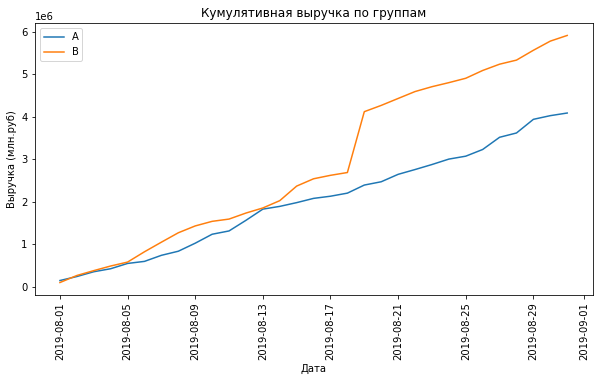

In [14]:
plt.figure(figsize = (10, 5))
plt.plot(aggregated_df['A'].cumsum(), label = 'A')
plt.plot(aggregated_df['B'].cumsum(), label = 'B')
plt.xticks(rotation=90)
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка (млн.руб)')
plt.legend();

График B стабильно показывает выручку большую, чем А. В период с 17 по 21 августа в графике B наблюдается резкий линейный скачок, после чего кривая B сохраняет угол наклона примерно равный графику A. Возможно, в этот период в группе B было совершено аномально много покупок или совершены покупки на аномально большую сумму. Все это произошло в течение одного дня, так как скачок не имеет точек излома

In [15]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


### Построим график кумулятивного среднего чека по группам. Сделайем выводы и предположения.

Создам сводную таблицу для упрощения дальнейшей работы

In [16]:
orders = orders.groupby(by = ['date', 'group']).agg(transactionId = ('transactionId', 'count'), 
                                                visitorId = ('visitorId', 'nunique'),
                                                revenue = ('revenue', 'sum'))
orders = orders.rename(columns = {'transactionId':'orders', 'visitorId':'buyers'})

In [17]:
orders['date'] = orders.index.get_level_values(0)
orders['group'] = orders.index.get_level_values(1)
orders = orders.reset_index(drop = True)

for i in ['revenue', 'orders', 'buyers']:
    orders['cumrevA'] = orders[orders['group'] == 'A'][i].cumsum()
    orders['cumrevB'] = orders[orders['group'] == 'B'][i].cumsum()
    orders[i] = orders['cumrevA'].fillna(orders['cumrevB'])
    orders = orders.drop(['cumrevA', 'cumrevB'], axis=1)

In [18]:
cummulativeDataA = orders[orders['group']=='A']
cummulativeDataB = orders[orders['group']=='B']

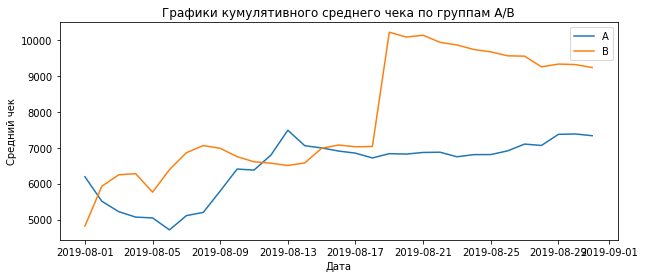

In [19]:
plt.figure(figsize=(10,4))
plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue']/cummulativeDataA['orders'], label = 'A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue']/cummulativeDataB['orders'], label = 'B')
plt.title('Графики кумулятивного среднего чека по группам A/B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

Данные о том, что средний чек группы B был все время до скачка выше, чем чек группы A согласуется с полученным ранее графиком. Поскольку резко вырос средний чек, отметем гипотезу о том, что было произведено очень много заказов в короткий период. Это заказы на аномально большую сумму.

In [20]:
#Здравствуйте, извините, что код в этой части такой неоптимизированный. 
#Возможно, вы могли бы дать мне пару советов по его улучшению? В идеале без lambda функций :)

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

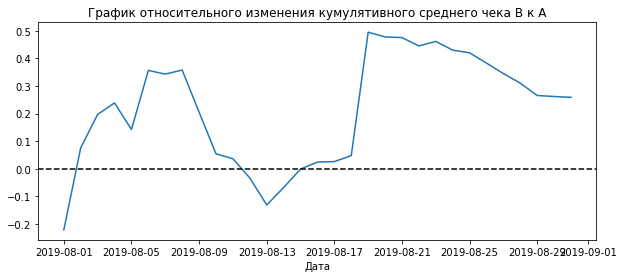

In [21]:
mergedCummulativeData = cummulativeDataA.merge(cummulativeDataB, left_on='date', right_on='date', suffixes=['A', 'B'])
mergedCummulativeData.head(5)
plt.figure(figsize=(10,4))
plt.plot(mergedCummulativeData['date'], ((mergedCummulativeData['revenueB']/mergedCummulativeData['ordersB'])/
                                       (mergedCummulativeData['revenueA']/mergedCummulativeData['ordersA'])-1))
plt.axhline(y=0, color='black', linestyle = '--')
plt.title('График относительного изменения кумулятивного среднего чека B к А')
plt.xlabel('Дата');

Этот график не дает много новой информации. Лишь подтверждает вывод из прошлых о том, что произошел аномальный скачок в группе B

### Построим график кумулятивного среднего количества заказов на посетителя по группам

In [22]:
aggregated_vs = visitors.groupby(['date', 'group'])['visitors'].sum().unstack()
aggregated_vs['A'] = aggregated_vs['A'].cumsum()
aggregated_vs['B'] = aggregated_vs['B'].cumsum()
aggregated_vs = aggregated_vs.rename(columns = {'A':'visitorsA', 'B':'visitorsB'})

In [23]:
mergedCummulativeData = mergedCummulativeData.merge(aggregated_vs, on = 'date')

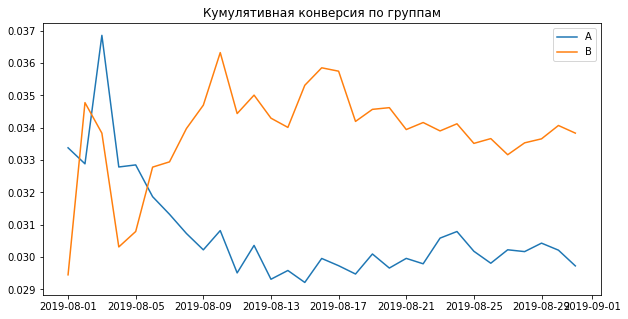

In [24]:
plt.figure(figsize = (10, 5))
plt.plot(mergedCummulativeData['date'], mergedCummulativeData['ordersA']/mergedCummulativeData['visitorsA'], label = 'A')
plt.plot(mergedCummulativeData['date'], mergedCummulativeData['ordersB']/mergedCummulativeData['visitorsB'], label = 'B')
plt.title('Кумулятивная конверсия по группам')
plt.legend();

Группа B показывает конверсию большую, чем группа А. Это может говорить о том, что выброс в середине графика группы B не настолько большой как может казаться. Частично он происходит по естесственным причинам

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

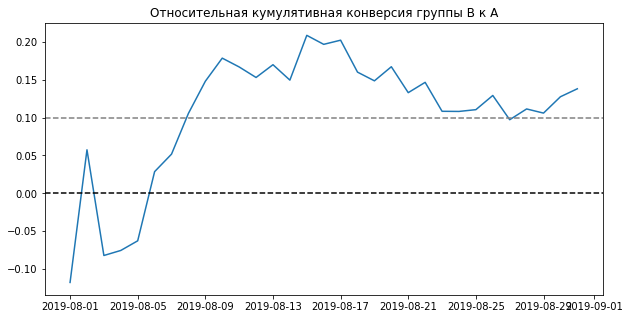

In [25]:
plt.figure(figsize=(10,5))
plt.plot(mergedCummulativeData['date'], 
         ((mergedCummulativeData['ordersB']/mergedCummulativeData['visitorsB']/(mergedCummulativeData['ordersA']/mergedCummulativeData['visitorsA']))-1))
plt.title('Относительная кумулятивная конверсия группы B к A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--');

Подтверждается вывод по прошлому графику. Стабильно конверсия группы B большк конверсии A ~ на 0.2

### Построим точечный график количества заказов по пользователям.

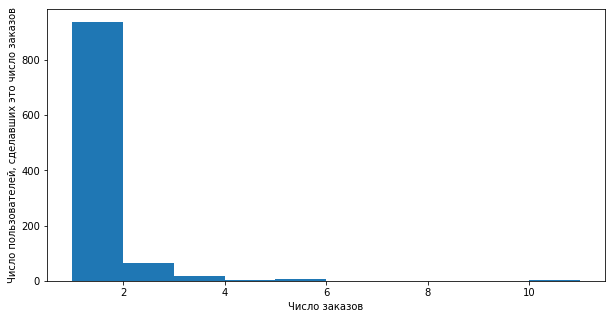

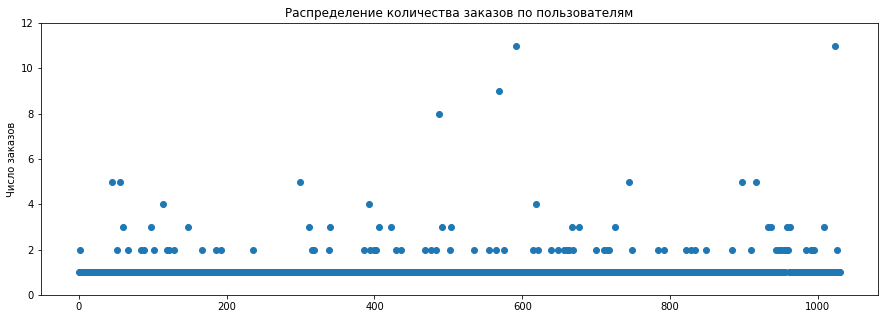

In [26]:
plt.figure(figsize=(10,5))
plt.hist(orders2.groupby(by = 'visitorId').agg({'transactionId':'nunique'}));
plt.xlabel('Число заказов')
plt.ylabel('Число пользователей, сделавших это число заказов')
plt.show()

plt.figure(figsize=(15,5))
x_values = pd.Series(range(0, len(orders2.groupby(by = 'visitorId').agg({'transactionId':'nunique'}))))
plt.scatter(x_values, orders2.groupby(by = 'visitorId').agg({'transactionId':'nunique'}));
plt.ylim(0, 12)
plt.title('Распределение количества заказов по пользователям')
plt.ylabel('Число заказов')
plt.show();

Удобно смотреть на второй график. Чем плотнее линия - тем чаще пользователи совершают заказ столько раз. Бесспорный лидер - единственный заказ. Однако есть и те, кто сделал 8Б 9 и 11 заказов. Это выбросы и от них в дальнейшем скорее всего надо будет избавляться. Благо, таких заказов около десятка. Совсем мало в сравнении с общей выборкой

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [27]:
ordersByUsers = orders2.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)
ordersByUsers.columns = ['visitorId', 'orders']
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print('95 перцентиль: {} \n99 перцентиль: {}'.format(percentiles[0],percentiles[1]))

95 перцентиль: 2.0 
99 перцентиль: 4.0


Действительно, лишь 5% пользователей совершили более двух заказов и 1% более 4.

### Построим точечный график стоимостей заказов.

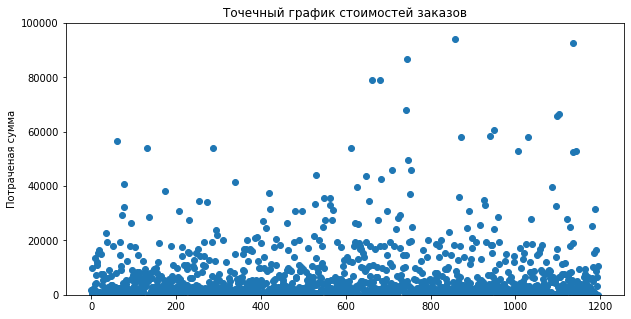

In [28]:
figure(figsize = (10, 5))
x_values = pd.Series(range(0, len(orders2)))
plt.scatter(x_values, orders2['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Потраченая сумма')
plt.ylim(0, 100000);

Судя по графику большая часть делает покупки до 20 000. Реже - до 40 000. Заказы дороже 60 000 - большая редкость.

### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [29]:
percentiles = np.percentile(orders2['revenue'], [95, 99]).round(2)
print('95 перцентиль: {} \n99 перцентиль: {}'.format(percentiles[0],percentiles[1]))

95 перцентиль: 28000.0 
99 перцентиль: 58233.2


Лишь 5% пользователей оставили в магазине более 28000 за заказ. И 1% более 58 233 рублей. Из этого следует, что значения выше - аномальны.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [30]:
ordersByUsersA = orders2[orders2['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = orders2[orders2['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['visitorId', 'orders']
print('Кол-во покупателей в группе A:', len(ordersByUsersA))
print('Кол-во покупок в группе А:', ordersByUsersA['orders'].sum())
print('Кол-во посетителей в группе A:', visitors[visitors['group']=='A']['visitors'].sum())
print('Кол-во покупателей в группе B:', len(ordersByUsersB))
print('Кол-во покупок в группе B:', ordersByUsersB['orders'].sum())
print('Кол-во посетителей в группе B:', (visitors[visitors['group']=='B']['visitors'].sum()))

Кол-во покупателей в группе A: 503
Кол-во покупок в группе А: 557
Кол-во посетителей в группе A: 18736
Кол-во покупателей в группе B: 586
Кол-во покупок в группе B: 640
Кол-во посетителей в группе B: 18916


**Гипотеза 1:** Есть статистически значимая разница в среднем кол-ве заказов на посетителя в зависимости от группы
- Н0 - Статистически значимая разница в среднем кол-ве заказов на посетителя в зависимости от группы есть
- H1 - Статистически значимой разницы в среднем кол-ве заказов на посетителя в зависимости от группы нет

In [31]:
 list_orders_1 =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA))):
    list_orders_1.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_orders_1, name = 'orders')

list_orders_2 =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB))):
    list_orders_2.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_orders_2, name = 'orders')

sampleA = pd.concat([ordersByUsersA['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], orders_by_non_purchased_users_B], axis=0)
print('Прирост конверсии группы B по отношению к группе A:', (sampleB.mean()/sampleA.mean()-1).round(5))
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('P-value:', results.pvalue.round(5))
if results.pvalue < alpha:
    print('Принята гипотеза H0. По неочищенным данным в конверсии групп A и B разница статистически значима')
else:
    print('Гипотеза H0 не принята. Следовательно справедлива гипотеза H1. По неочищенным данным различий в конверсии групп A и B нет')

Прирост конверсии группы B по отношению к группе A: 0.13808
P-value: 0.01679
Принята гипотеза H0. По неочищенным данным в конверсии групп A и B разница статистически значима


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

**Гипотеза 2**: Есть статистически значимое различие в среднем чеке заказа между группами по «сырым» данным
- Н0: Статистически значимое различие в среднем чеке заказа между группами по «сырым» данным есть
- Н1: Статистически значимое различие в среднем чеке заказа между группами по «сырым» данным отсутствует

In [32]:
coverg = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
print('Относительное изменение в среднем чеке A к B:', coverg)
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным в конверсии групп A и B разница статистически значима. Гипотеза Н0 принята.')
else:
    print('По неочищенным данным различий в конверсии групп A и B нет. Гипотеза Н0 отвергнута в пользу гипотезы Н1')


Относительное изменение в среднем чеке A к B: 0.434839662157402
P-value: 0.1054395262145376
По неочищенным данным различий в конверсии групп A и B нет. Гипотеза Н0 отвергнута в пользу гипотезы Н1


### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

Чтобы рассчитать статистическую значимость различий в конверсии между группами по «очищенным» данным, очистим их от 5% выбросов. В нашем случае:
- Пользователи, сделавшие более 2 заказов
- Пользователи, сделавшие заказ на более чем 28 000р. 

In [33]:
manyorders = pd.concat([ordersByUsersA[ordersByUsersA['orders']>2]['visitorId'], 
                        ordersByUsersB[ordersByUsersB['orders']>2]['visitorId']], axis = 0)
manyrevenue = orders2[orders2['revenue']>28000]['visitorId']
print('Аномальных пользователей:', len(pd.concat([manyorders, manyrevenue], axis = 0).drop_duplicates()))

Аномальных пользователей: 74


**Гипотеза 3**: Есть статистически значимые различия в конверсии между группами по «очищенным» данным
- Н0: Статистически значимые различия в конверсии между группами по «очищенным» данным есть
- Н1: Статистически значимые различия в конверсии между группами по «очищенным» данным отсутствуют

In [34]:
abnormalUsers = pd.concat([manyorders, manyrevenue], axis = 0).drop_duplicates()

sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_A
], axis = 0)
sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_B
], axis = 0)
print('Относительный прирост конверсии группы B по отношению к группе A "чистых" данных:', sampleBFiltered.mean()/sampleAFiltered.mean()-1)
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value:', results.pvalue)
if results.pvalue < alpha:
    print('По неочищенным данным в конверсии групп A и B разница статистически значима. Принята гипотеза Н0.')
else:
    print('По неочищенным данным различий в конверсии групп A и B нет. Гипотеза Н0 отвергнута в пользу гипотезы Н1.')

Относительный прирост конверсии группы B по отношению к группе A "чистых" данных: 0.17270102073526417
P-value: 0.013042592743036745
По неочищенным данным в конверсии групп A и B разница статистически значима. Принята гипотеза Н0.


**Гипотеза 4**: Есть статистически значимые различия в среднем чеке между группами по «очищенным» данным

- Н0: Статистически значимые различия в среднем чеке между группами по «очищенным» данным есть
- Н1: Статистически значимые различия в среднем чеке между группами по «очищенным» данным отсутствуют

In [35]:
print('Относительное изменение среднего чека в группе B по отношению группы A "чистых" данных:',
orders2[np.logical_and(orders2['group']=='B', np.logical_not(orders2['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
/orders2[np.logical_and(orders2['group']=='A', np.logical_not(orders2['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1)
       
       
results = stats.mannwhitneyu(orders2[np.logical_and(orders['group']=='A', np.logical_not(orders2['visitorId'].isin(abnormalUsers)))]['revenue'],
                             orders2[np.logical_and(orders['group']=='B', np.logical_not(orders2['visitorId'].isin(abnormalUsers)))]['revenue'])
print('P-value:', results.pvalue)
if results.pvalue < alpha:
    print('По неочищенным данным в среднем чеке групп A и B разница статистически значима. Принята гипотеза Н0.')
else:
    print('По неочищенным данным различий в среднем чеке групп A и B нет. Гипотеза Н0 отвергнута. Принята гипотеза Н1')

Относительное изменение среднего чека в группе B по отношению группы A "чистых" данных: -0.019624288331982598
P-value: 0.9636988946009222
По неочищенным данным различий в среднем чеке групп A и B нет. Гипотеза Н0 отвергнута. Принята гипотеза Н1


## Выводы

После очистки данных от аномальных пользователей, тест можно остановить и считать завершенным успешно, поскольку:
- Кумулятивные данные о выручек, конверсии и среднем чеке почти всегда лидировали в группе B
- После удаления из исследования аномальных пользователей разница между группой A и B значительно сократилась, однако она все еще осталась
- В конверсии что в очищенных, что в исходных, что в очищенных данных есть статистически значимая разница
- В конверсии по средним чекам, что в исходных, что в очищенных данных нет статистически значимой раницы

Исходя из этого можно считать группу B "победителем" A/B теста